<a href="https://colab.research.google.com/github/xMatuszek/object_detection_model_using_thermal_camera_dataset/blob/main/detect_on_thermal_and_rgb_object_detection_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/WongKinYiu/yolov9
%cd yolov9
!pip3 install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 713, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 713 (delta 247), reused 234 (delta 214), pack-reused 374
Receiving objects: 100% (713/713), 3.24 MiB | 7.01 MiB/s, done.
Resolving deltas: 100% (292/292), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.7 MB/s eta 0:00:00


In [ ]:
!mkdir -p /content/weights
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
import os
os.chdir('/content')
HOME = os.getcwd()
print(HOME)

os.chdir(f'/content/drive/MyDrive/ob_thermal_camera/dataset')
dataset_location = os.getcwd()
print(dataset_location)

/content
/content/drive/.shortcut-targets-by-id/1H3LcR7aHeOJZ5WclkYoWlaekDL4p_6GI/dataset


#Testowanie modelu RGB na nieetykietowanym zbiorze termalnym:

In [ ]:
%cd /content/yolov9
!python detect_dual.py \
--img 640 --device 0 \
--weights /content/drive/MyDrive/ob_thermal_camera/dataset/best_rgb.pt \
--source {dataset_location}/images_thermal_val/data \
--hide-labels \
--hide-conf

/content/yolov9
detect_dual: weights=['/content/drive/MyDrive/ob_thermal_camera/dataset/best_rgb.pt'], source=/content/drive/.shortcut-targets-by-id/1H3LcR7aHeOJZ5WclkYoWlaekDL4p_6GI/dataset/images_thermal_val/data, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-95-g493e523 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50707518 parameters, 0 gradients, 236.7 GFLOPs
image 1/1151 /content/drive/.shortcut-targets-by-id/1H3LcR7aHeOJZ5WclkYoWlaekDL4p_6GI/dataset/images_thermal_val/data/video-57kWWRyeqqHs3Byei-frame-000816-b6tuLjNco8MfoBs3d.jpg: 512x640 5 cars, 2 persons, 1 s

####**UWAGA:** Podajemy zbiór walidacyjny (oryginalnego zbioru w formacie COCO!) jako zbiór nieetykietowany, ponieważ do stworzenia modelu użyliśmy jedynie danych ze zbioru treningowego (ok. 10k zdjęc) i jego dzieliliśmy na odpowiednie części

Wyświetlenie pierwszych 10 przykładowych wyników

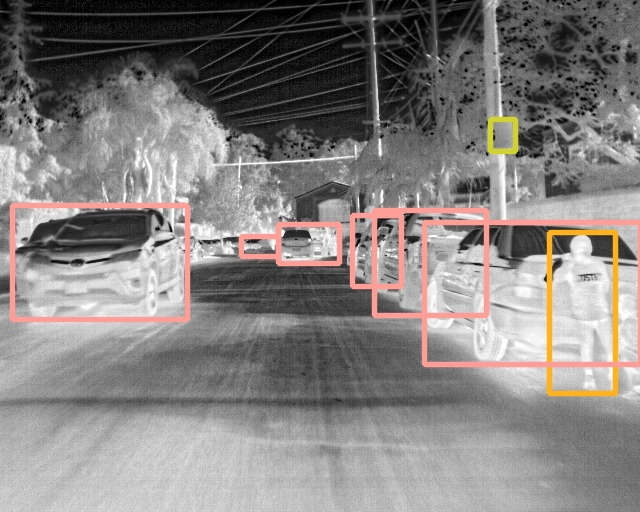

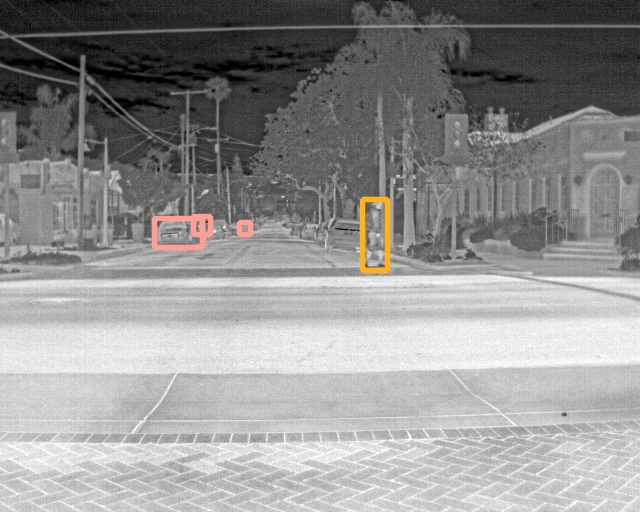

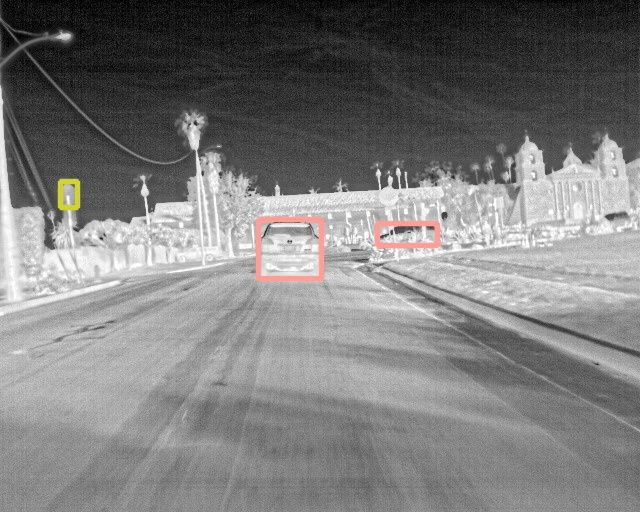

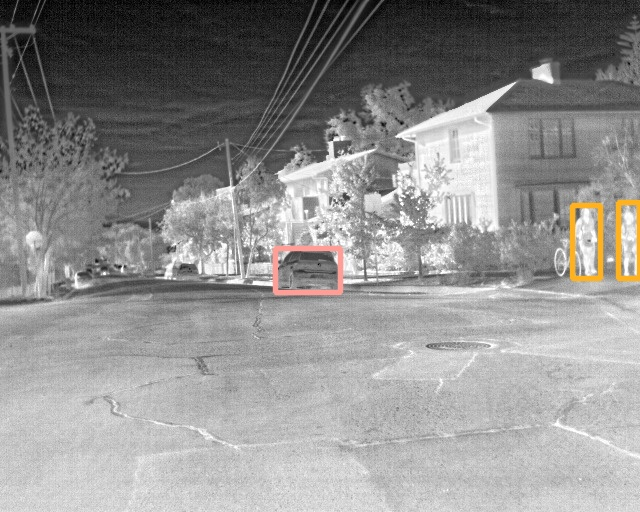

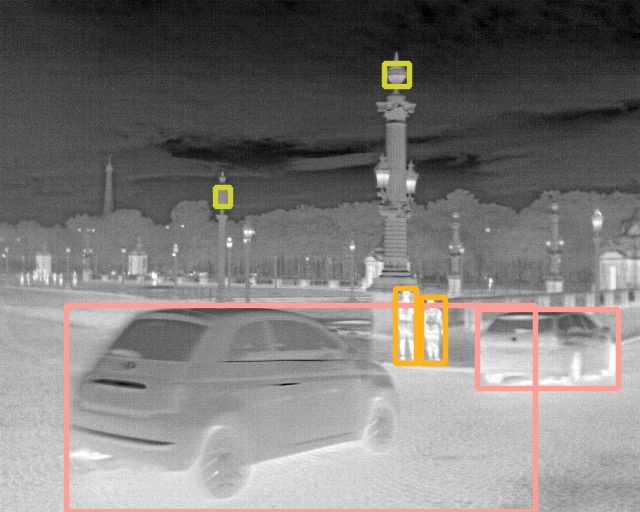

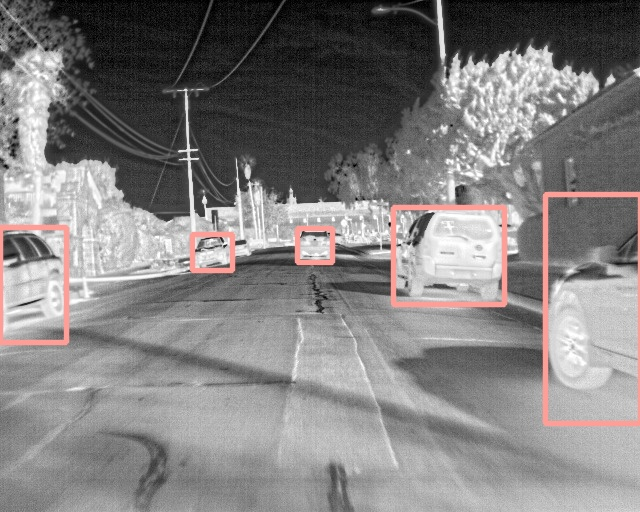

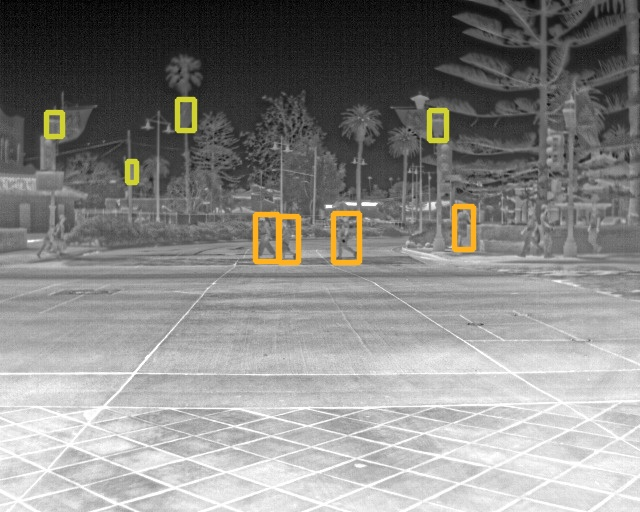

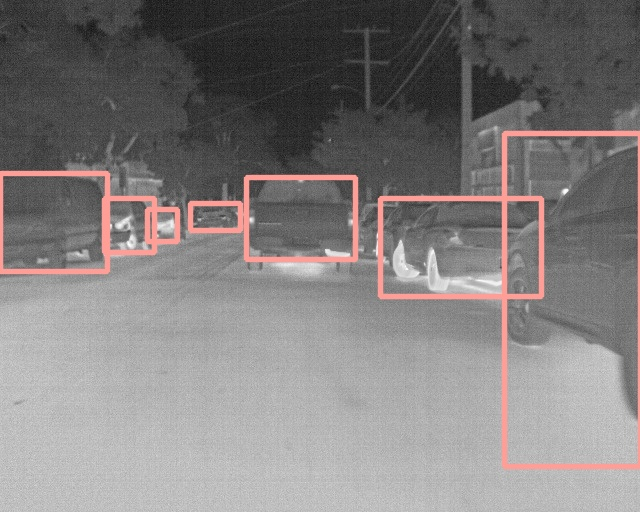

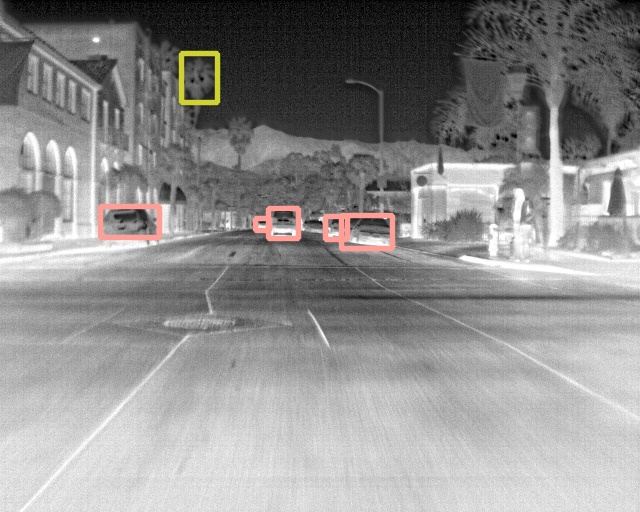

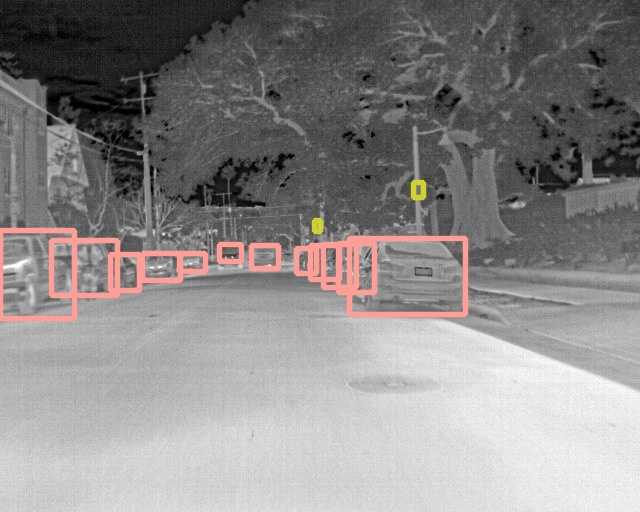

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))

#Testowanie modelu THERMAL na nieetykietowanym zbiorze termalnym

In [ ]:
%cd /content/yolov9
!python detect_dual.py \
--img 640 --device 0 \
--weights /content/drive/MyDrive/ob_thermal_camera/dataset/best_thermal.pt \
--source {dataset_location}/images_thermal_val/data \
--hide-labels \
--hide-conf

/content/yolov9
detect_dual: weights=['/content/drive/MyDrive/ob_thermal_camera/dataset/best_thermal.pt'], source=/content/drive/.shortcut-targets-by-id/1H3LcR7aHeOJZ5WclkYoWlaekDL4p_6GI/dataset/images_thermal_val/data, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50707518 parameters, 0 gradients, 236.7 GFLOPs
image 1/1151 /content/drive/.shortcut-targets-by-id/1H3LcR7aHeOJZ5WclkYoWlaekDL4p_6GI/dataset/images_thermal_val/data/video-57kWWRyeqqHs3Byei-frame-000816-b6tuLjNco8MfoBs3d.jpg: 512x640 8 cars, 3 persons,

####**UWAGA:** Podajemy zbiór walidacyjny (oryginalnego zbioru w formacie COCO!) jako zbiór nieetykietowany, ponieważ do stworzenia modelu użyliśmy jedynie danych ze zbioru treningowego (ok. 10k zdjęc) i jego dzieliliśmy na odpowiednie części


Wyświetlenie pierwszych 10 przykładowych wyników

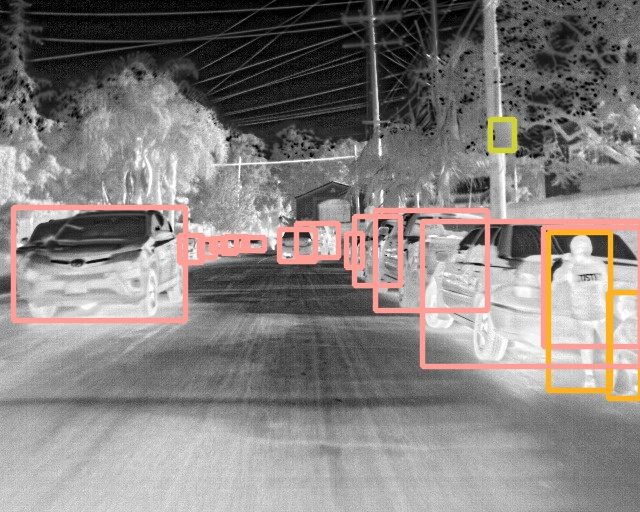

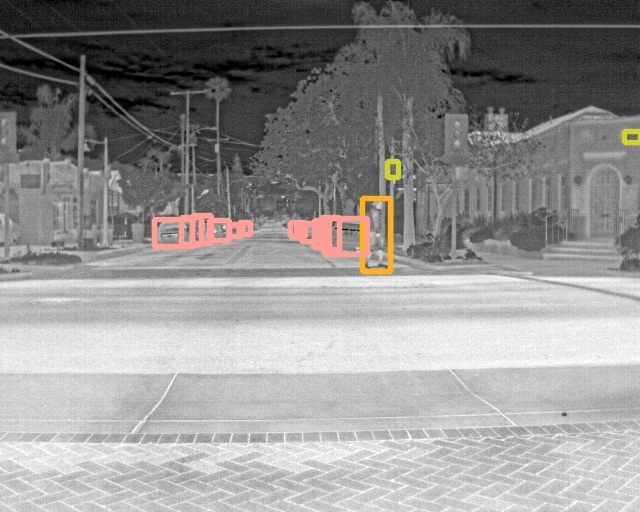

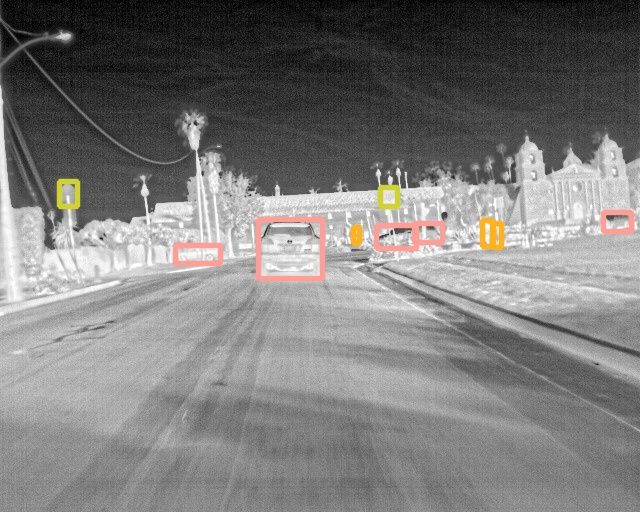

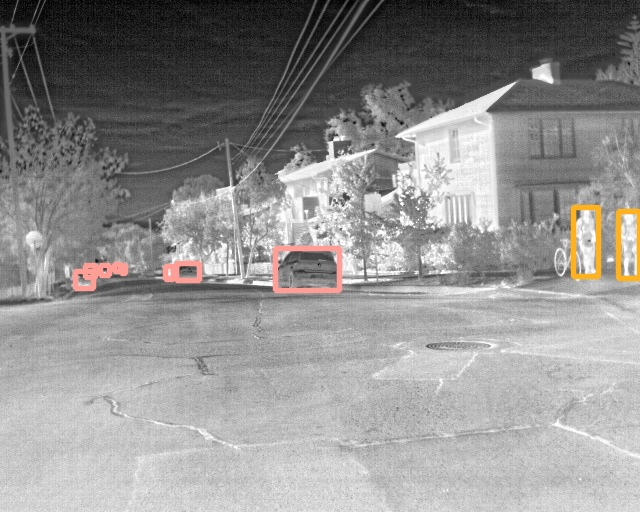

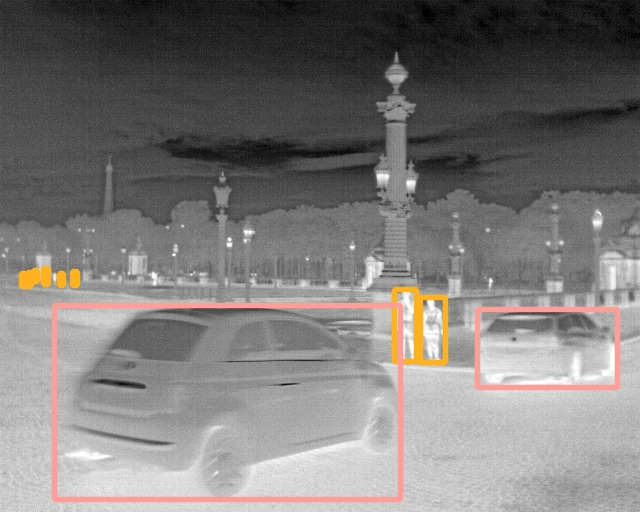

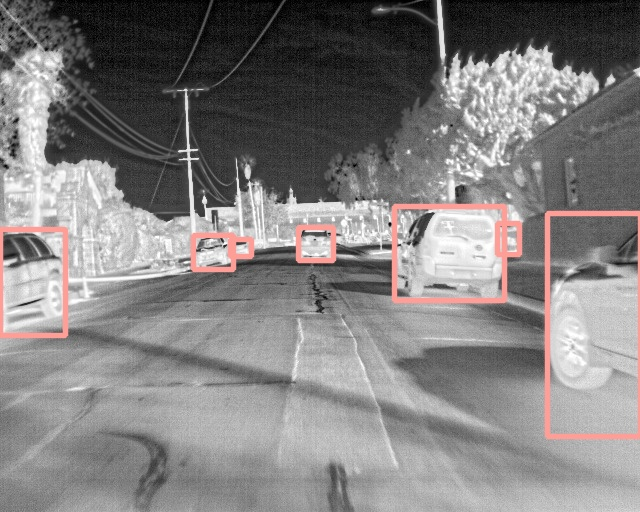

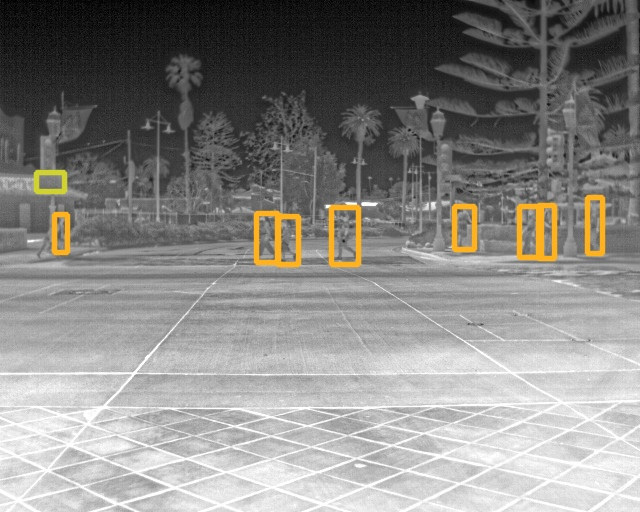

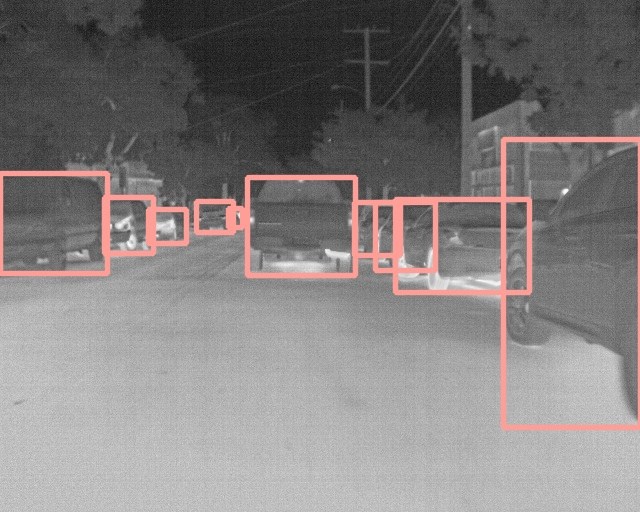

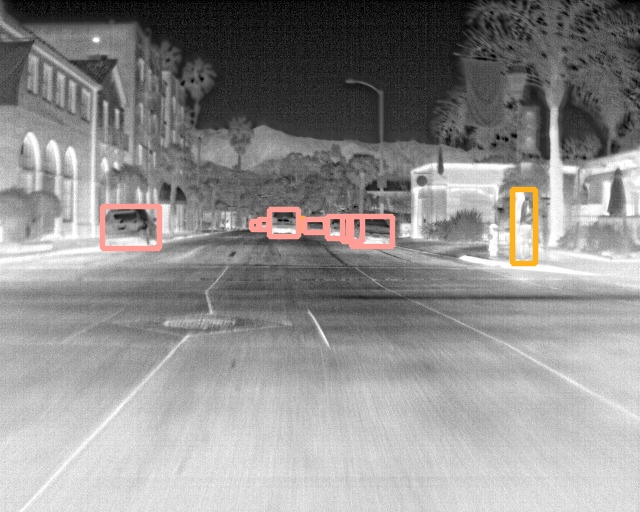

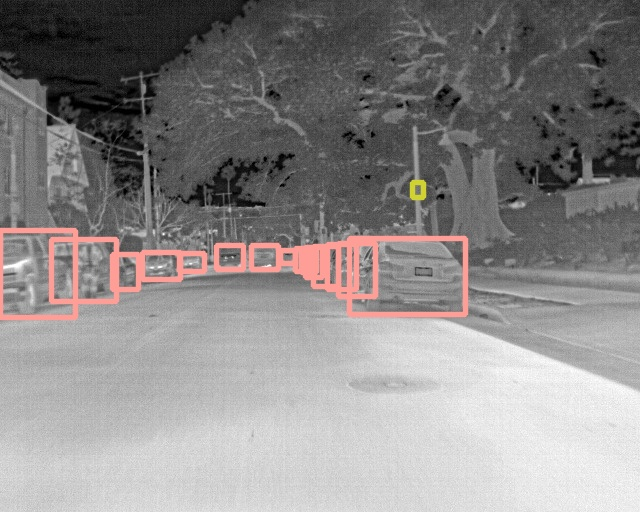

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))

#Porównanie modelu THERMAL dla zbioru RGB i THERMAL

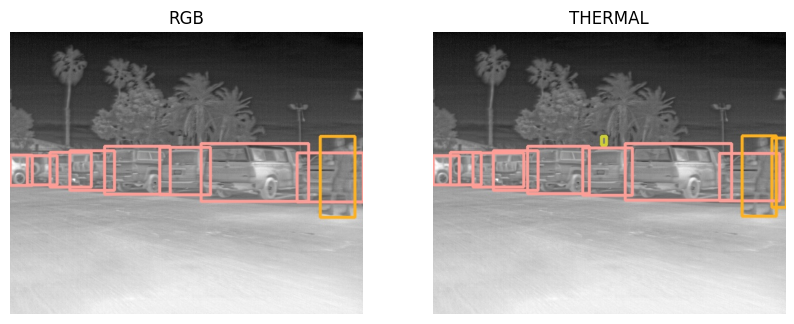

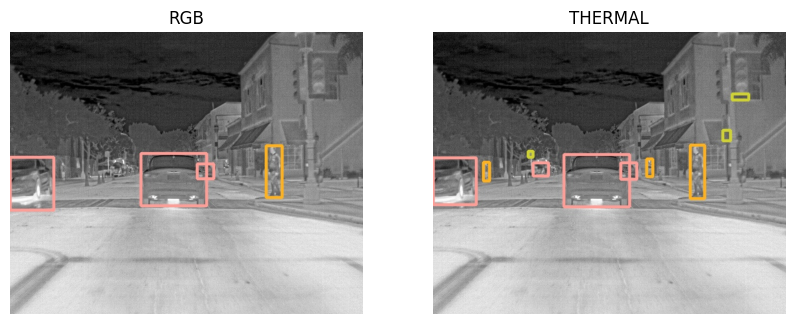

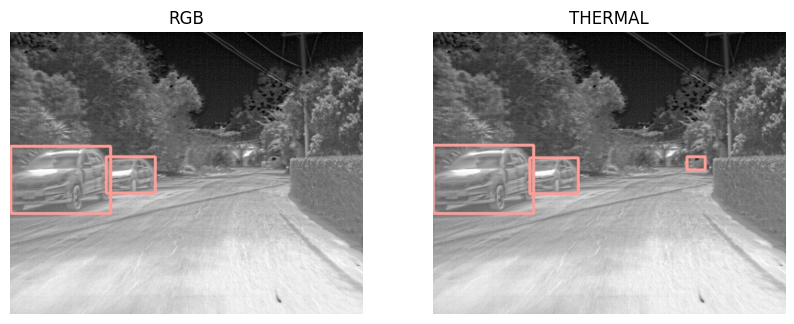

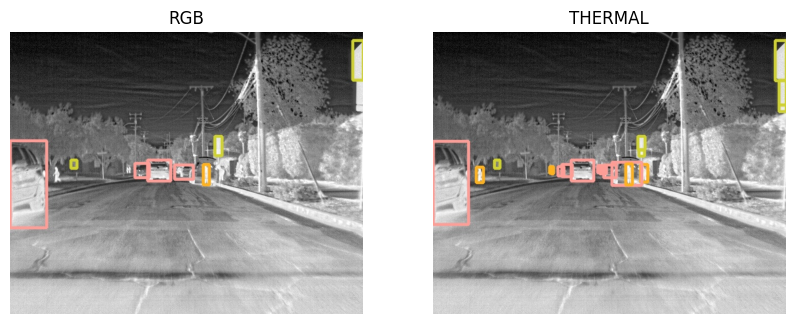

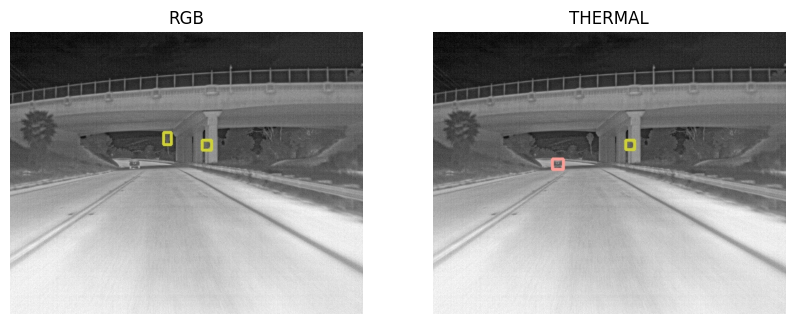

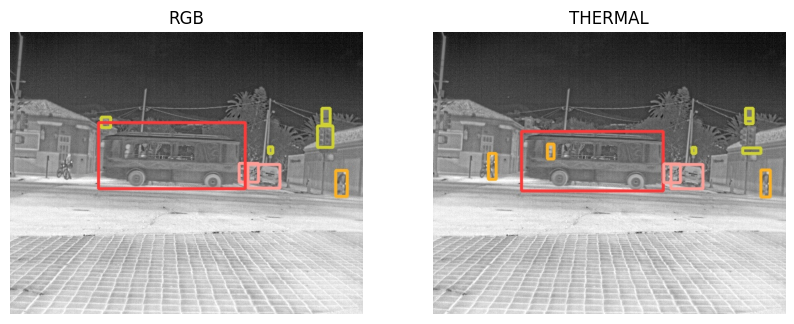

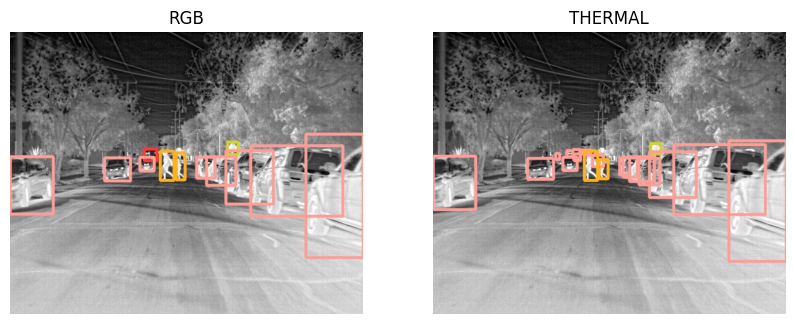

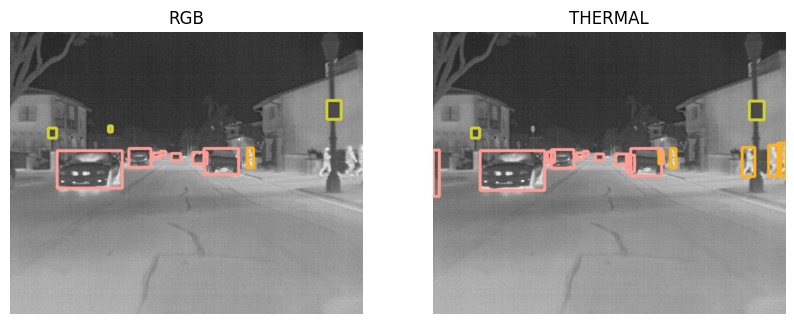

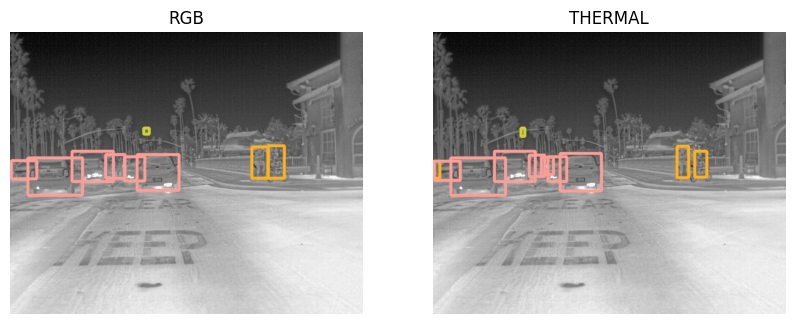

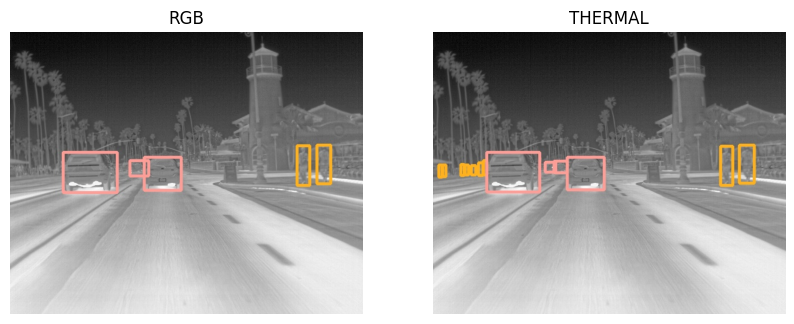

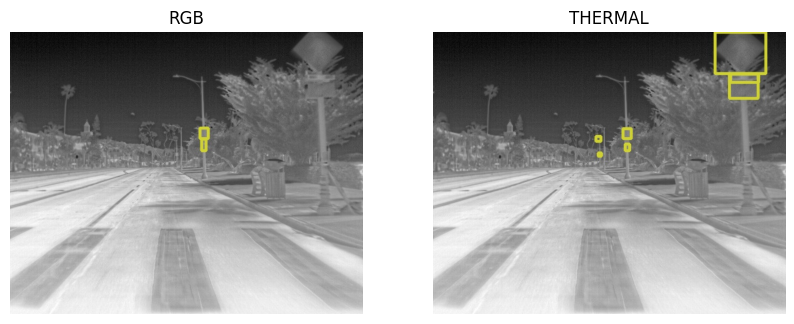

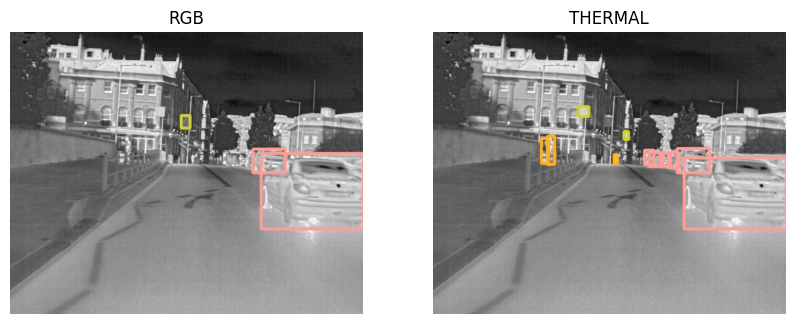

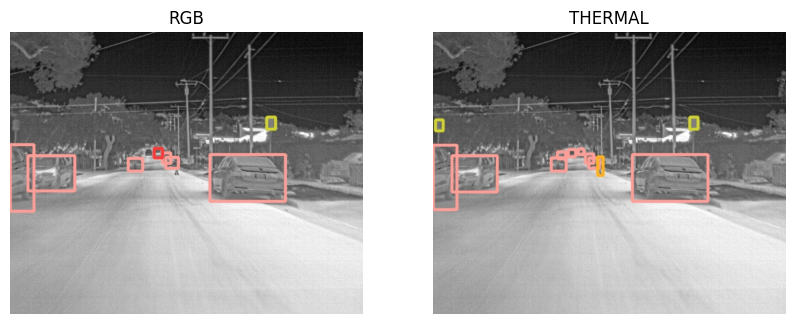

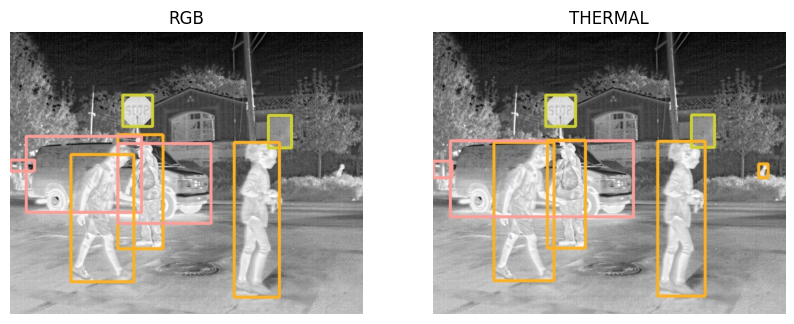

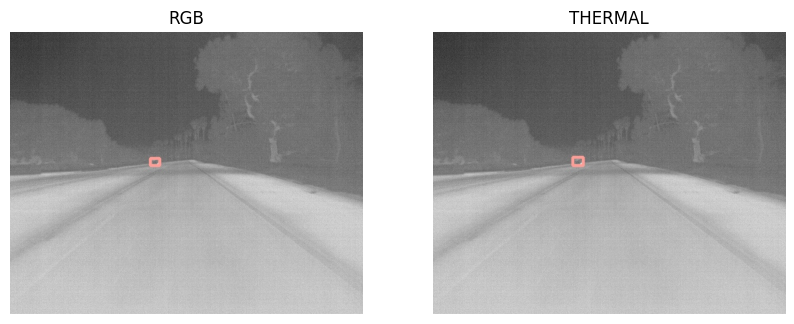

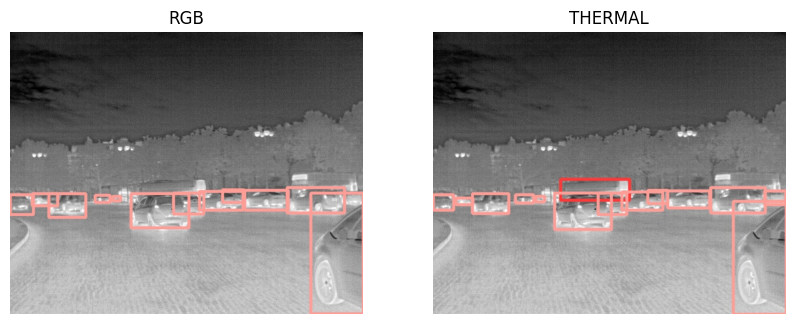

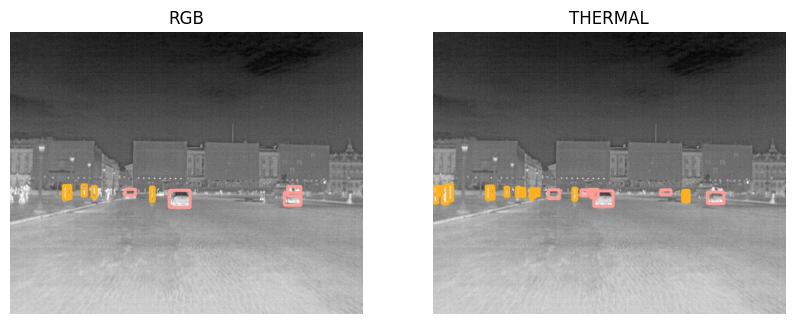

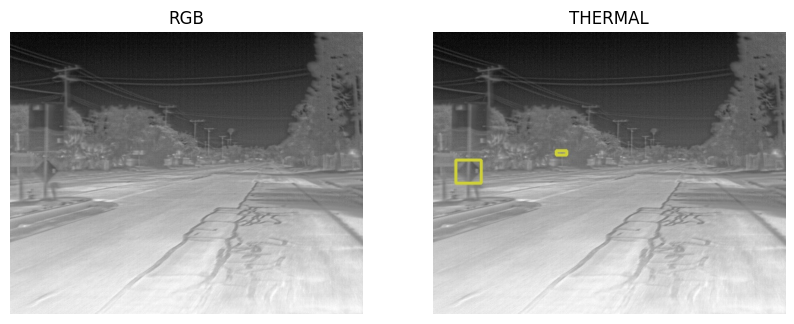

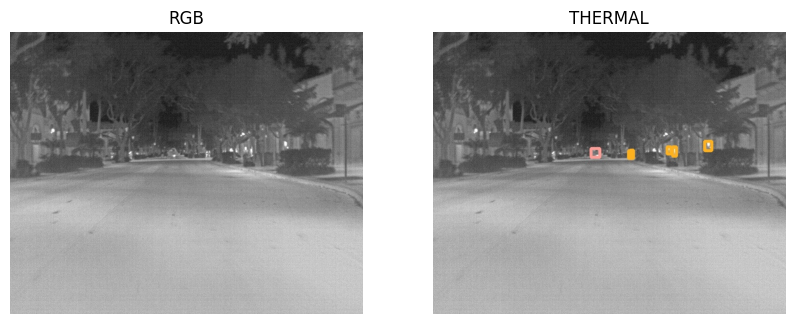

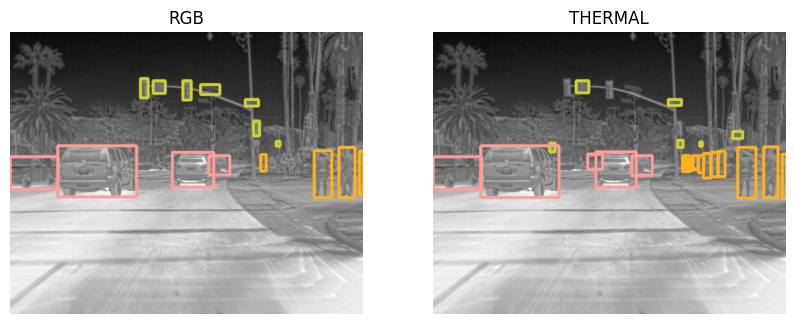

In [ ]:
import os
import glob
from IPython.display import display
from PIL import Image as PILImage
import matplotlib.pyplot as plt

def get_images_in_directory(directory):
    # Pobierz pełne ścieżki do wszystkich obrazów w katalogu
    return {os.path.basename(file): file for file in glob.glob(os.path.join(directory, '*.jpg'))}

def find_common_images(dir1, dir2):
    images_in_dir1 = get_images_in_directory(dir1)
    images_in_dir2 = get_images_in_directory(dir2)

    # Znajdź wspólne obrazy
    common_images = images_in_dir1.keys() & images_in_dir2.keys()
    return {image: (images_in_dir1[image], images_in_dir2[image]) for image in common_images}

# Przykładowe ścieżki do katalogów
directory1 = f'{HOME}/yolov9/runs/detect/exp/'
directory2 = f'{HOME}/yolov9/runs/detect/exp2/'

# Podpisy do katalogów
label1 = 'RGB'
label2 = 'THERMAL'

common_images = find_common_images(directory1, directory2)

# Wyświetl pierwsze 10 wspólnych obrazów obok siebie
for i, (image_name, (path1, path2)) in enumerate(common_images.items()):
    if i >= 20:
        break

    # Ładowanie obrazów
    img1 = PILImage.open(path1)
    img2 = PILImage.open(path2)

    # Wyświetlanie obrazów obok siebie
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Wyświetlanie pierwszego obrazu
    axs[0].imshow(img1)
    axs[0].set_title(label1)
    axs[0].axis('off')

    # Wyświetlanie drugiego obrazu
    axs[1].imshow(img2)
    axs[1].set_title(label2)
    axs[1].axis('off')

    plt.show()
